In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\hearth desese\\train.csv")
test_df=pd.read_csv("D:\\machine learning projecsts folders\\hearth desese\\test.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [5]:
real_test_df=test_df.copy()

In [6]:
train_df.drop(columns=['id'],inplace=True)
test_df.drop(columns=['id'],inplace=True)

converting hearth diese into int 

In [7]:
train_df['Heart Disease']=train_df['Heart Disease'].map({'Presence':1,'Absence':0})

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  int64  
dtypes: f

In [9]:
continues_value=[]
binary_number=[]
for i in train_df.columns.drop('Heart Disease'):
    if((train_df[i].nunique())<10):
        binary_number.append(i)
    else:
        continues_value.append(i)

In [10]:
binary_number

['Sex',
 'Chest pain type',
 'FBS over 120',
 'EKG results',
 'Exercise angina',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

In [11]:
continues_value

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# model with ordinal ncording values not change in the data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from catboost import CatBoostClassifier
# 2. LightGBM
from lightgbm import LGBMClassifier
# 3. XGBoost
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,log_loss
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [13]:
X=train_df.drop(columns=['Heart Disease'])
y=train_df['Heart Disease']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(504000, 13)
(504000,)
(126000, 13)
(126000,)


basic pipeline

In [16]:
prepross=ColumnTransformer(transformers=[
    ('nums',StandardScaler(),continues_value),
    ('binary','passthrough',binary_number)
],remainder='passthrough')

In [ ]:
prep=Pipeline(steps=[
    ('prep',prepross),
    ("reg",LogisticRegression())
])

validation score using kfold and scoring as acuracy in cv

In [18]:
kfold=KFold(n_splits=15,shuffle=True,random_state=42)
score=cross_val_score(prep,X,y,scoring='accuracy',cv=kfold)

In [19]:
score.mean(),score.std()

(np.float64(0.8831365079365078), np.float64(0.001625534778371912))

<Axes: >

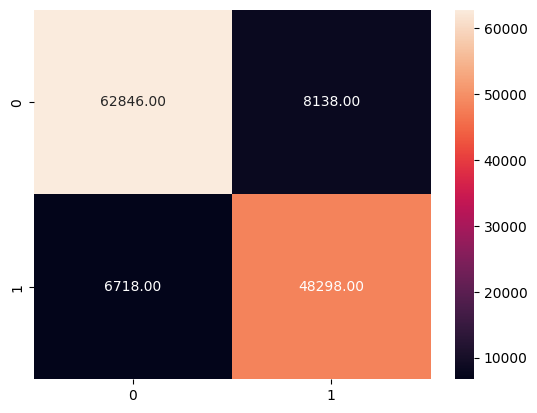

In [20]:
prep.fit(x_train,y_train)
y_pred=prep.predict(x_test)
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='0.2f')

In [21]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     70984
           1       0.86      0.88      0.87     55016

    accuracy                           0.88    126000
   macro avg       0.88      0.88      0.88    126000
weighted avg       0.88      0.88      0.88    126000



In [22]:
y_pred_proba = prep.predict_proba(x_test)
loss = log_loss(y_test, y_pred_proba)

print("Log Loss:", loss)

Log Loss: 0.2826589557179638


In [23]:
train_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [24]:
def model_df(model_name,model):
    output=[]
    output.append(model_name)
    pipeline=Pipeline(steps=[
        ('prep',prepross),
        ('model',model)
    ])
    kfold=KFold(n_splits=10,shuffle=True,random_state=42)  
    score=cross_val_score(pipeline,X,y,scoring='accuracy',cv=kfold)
    output.append(score.mean())
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    pipeline.fit(x_train,y_train)
    y_pred_proba=pipeline.predict_proba(x_test)
    loss = log_loss(y_test, y_pred_proba)
    output.append(loss)
    return output

In [25]:
model_dic={
    'logisticreg':LogisticRegression(),
    "randomforest":RandomForestClassifier(),
    "gradinentboost":GradientBoostingClassifier(),
    'xgboost':XGBClassifier(),
    'lightgbm':LGBMClassifier(),
}

In [26]:
model_output = []
for model_name,model in model_dic.items():
    model_output.append(model_df(model_name, model))

[LightGBM] [Info] Number of positive: 254273, number of negative: 312727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448453 -> initscore=-0.206922
[LightGBM] [Info] Start training from score -0.206922


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254199, number of negative: 312801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448323 -> initscore=-0.207450
[LightGBM] [Info] Start training from score -0.207450


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254128, number of negative: 312872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448198 -> initscore=-0.207956
[LightGBM] [Info] Start training from score -0.207956


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 253980, number of negative: 313020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447937 -> initscore=-0.209012
[LightGBM] [Info] Start training from score -0.209012


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254238, number of negative: 312762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448392 -> initscore=-0.207172
[LightGBM] [Info] Start training from score -0.207172


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254294, number of negative: 312706
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448490 -> initscore=-0.206772
[LightGBM] [Info] Start training from score -0.206772


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254082, number of negative: 312918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448116 -> initscore=-0.208284
[LightGBM] [Info] Start training from score -0.208284


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254333, number of negative: 312667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448559 -> initscore=-0.206494
[LightGBM] [Info] Start training from score -0.206494


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254164, number of negative: 312836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448261 -> initscore=-0.207699
[LightGBM] [Info] Start training from score -0.207699


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 254395, number of negative: 312605
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448668 -> initscore=-0.206052
[LightGBM] [Info] Start training from score -0.206052


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 226018, number of negative: 277982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448448 -> initscore=-0.206942
[LightGBM] [Info] Start training from score -0.206942


c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [27]:
model_dff = pd.DataFrame(model_output, columns=['name','acuraccy','loss'])
model_dff.sort_values(['loss'])

,name,acuraccy,loss
3,xgboost,0.888233,0.270190
4,lightgbm,0.887870,0.270500
2,gradinentboost,0.887063,0.274328
0,logisticreg,0.883149,0.282659
1,randomforest,0.880897,0.371563


convertin the numerical binary numbers into categorical number as it has no specific order to do thins

In [33]:
prep1=Pipeline(steps=[
    ('prep',prepross),
    ("reg",KNeighborsClassifier())
])

In [34]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)  
score=cross_val_score(prep1,X,y,scoring='accuracy',cv=kfold)

In [36]:
score.mean()

np.float64(0.8709031746031746)

<Axes: >

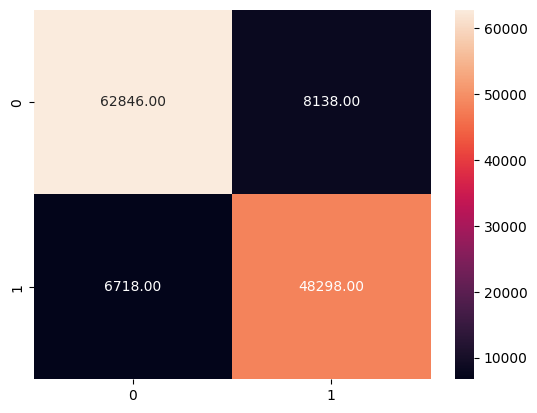

In [38]:
prep1.fit(x_train,y_train)
y_pred=prep.predict(x_test)
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='0.2f')

In [39]:
y_pred_proba = prep1.predict_proba(x_test)
loss = log_loss(y_test, y_pred_proba)

print("Log Loss:", loss)

Log Loss: 1.4202073026595934
